# NN for Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
df0 = pd.read_csv('Boston.csv')
df0.shape

(506, 14)

In [6]:
df0[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df0.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [8]:
df = df0.values

In [9]:
X = df[:,0:13]
y = df[:,13]

In [10]:
# Reserve test set for performance evaluation

In [11]:
seed = 7

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,
                                                random_state=seed)

In [14]:
# Scale dataset

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
Xtrain_trans = scaler.transform(X_train)
Xtest_trans = scaler.transform(X_test)

## Model

In [17]:
# use a single hidden layer since dataset is small

In [18]:
# try an input layer with 64 nodes, hidden layer with 64 nodes too

In [19]:
# try 10 epochs, then will increase to 50

In [20]:
# for regression use output layer with one node

In [23]:
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape=(13,)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
model.fit(Xtrain_trans,y_train,epochs =10, batch_size = 1)

W1206 17:37:36.915021 17372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1206 17:37:36.940953 17372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1206 17:37:36.947933 17372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1206 17:37:37.016751 17372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1206 17:37:37.182325 17372 deprecation_wrapper.py:119] From C:\ProgramData\Anac

Epoch 1/10
404/404 [==============================] - 1s 1ms/step - loss: 142.5979 - mean_absolute_error: 8.6453
Epoch 2/10
404/404 [==============================] - 0s 863us/step - loss: 19.8082 - mean_absolute_error: 3.0221
Epoch 3/10
404/404 [==============================] - 0s 940us/step - loss: 15.0678 - mean_absolute_error: 2.7019
Epoch 4/10
404/404 [==============================] - 0s 874us/step - loss: 13.5619 - mean_absolute_error: 2.4983
Epoch 5/10
404/404 [==============================] - 0s 834us/step - loss: 12.4079 - mean_absolute_error: 2.3873
Epoch 6/10
404/404 [==============================] - 0s 943us/step - loss: 11.6565 - mean_absolute_error: 2.3623
Epoch 7/10
404/404 [==============================] - 0s 805us/step - loss: 10.8828 - mean_absolute_error: 2.2548
Epoch 8/10
404/404 [==============================] - 0s 864us/step - loss: 10.6440 - mean_absolute_error: 2.1977
Epoch 9/10
404/404 [==============================] - 0s 859us/step - loss: 9.8680 - mean

In [24]:
# try 50 epochs with no output

In [25]:
model = Sequential()
model.add(Dense(64,activation = 'relu', input_shape=(13,)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
model.fit(Xtrain_trans,y_train,epochs =50, batch_size = 1,verbose = 0)

In [26]:
model.evaluate(Xtest_trans,y_test,verbose=0)

[22.398742951598823, 2.6100657313477758]

In [27]:
# test mse is 22.39

In [28]:
# test mae is 2.61

In [29]:
# predictions are 2610 dollars away from observed prices, on average

## Cross validation - customized

In [30]:
def build_model():
    model = Sequential()
    model.add(Dense(64,activation = 'relu', input_shape=(13,)))
    model.add(Dense(64,activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return model

In [31]:
# use 4 folds

In [32]:
k = 4
n = len(Xtrain_trans)//k
n

101

In [33]:
# n is number of data rows in each fold

In [34]:
scores = []

In [35]:
# try epochs = 50

In [38]:
for i in range(k):
    print ('processing fold #', i)
    
    # Select ith fold test set
    X_val = Xtrain_trans[i*n:(i+1)*n]
    y_val = y_train[i*n:(i+1)*n]
        
    # Create ith fold train set
    X_fold = np.concatenate([Xtrain_trans[:i*n],Xtrain_trans[(i+1)*n:]],axis = 0)
    y_fold = np.concatenate([y_train[:i*n],y_train[(i+1)*n:]],axis = 0)
    
    model = build_model()
    # Train ith fold
    model.fit(X_fold,y_fold, epochs = 50, batch_size = 1,verbose = 0)  
    
    # Test ith fold
    val_mse, val_mae = model.evaluate(X_val,y_val,verbose = 0)
    scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [39]:
scores

[2.4410833037725768,
 2.7344679360342496,
 2.0412997644726594,
 2.2085400076195745]

In [40]:
np.mean(scores)

2.3563477529747647

In [41]:
# On average we are off by 2350 dollars

# Tuning the number of epochs

In [42]:
# memory clean up

In [43]:
from keras import backend as K

In [44]:
K.clear_session()

In [45]:
# slightly modify the for loop to record MAE values after each epoch

In [48]:
all_scores = []

In [49]:
for i in range(k):
    print ('processing fold #', i)
    
    # Select ith fold test set
    X_val = Xtrain_trans[i*n:(i+1)*n]
    y_val = y_train[i*n:(i+1)*n]
        
    # Create ith fold train set
    X_fold = np.concatenate([Xtrain_trans[:i*n],Xtrain_trans[(i+1)*n:]],axis = 0)
    y_fold = np.concatenate([y_train[:i*n],y_train[(i+1)*n:]],axis = 0)
    
    model = build_model()
    # Train ith fold
    output = model.fit(X_fold,y_fold, validation_data=(X_val,y_val),
                       epochs = 150, batch_size = 1,verbose = 0)  
    mae_history = output.history['val_mean_absolute_error']
    all_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
len(all_scores)

4

In [51]:
len(all_scores[0])

150

In [52]:
# it is a list of 4 lists, each with 150 values

In [53]:
cols = range(1,5)

In [54]:
aux = np.vstack(all_scores).T
aux[:5]

array([[4.701958  , 4.52863194, 4.32613552, 3.96076947],
       [2.98316334, 3.51433069, 3.43704746, 2.95929071],
       [2.72018643, 3.21671571, 2.94449113, 2.68209605],
       [2.51272513, 3.14756122, 2.92020133, 2.62718545],
       [2.41439858, 2.97019954, 2.69087478, 2.38360895]])

In [55]:
aux2 = pd.DataFrame(aux,columns = cols)

In [56]:
aux2[:5]

,1,2,3,4
0,4.701958,4.528632,4.326136,3.960769
1,2.983163,3.514331,3.437047,2.959291
2,2.720186,3.216716,2.944491,2.682096
3,2.512725,3.147561,2.920201,2.627185
4,2.414399,2.970200,2.690875,2.383609


In [57]:
# cols are folds, rows are epochs

In [58]:
# find average MAEs per epoch

In [59]:
aux3 = aux2.copy()

In [60]:
aux3['means'] = aux3.mean(axis=1)
aux3[:5]

,1,2,3,4,means
0,4.701958,4.528632,4.326136,3.960769,4.379374
1,2.983163,3.514331,3.437047,2.959291,3.223458
2,2.720186,3.216716,2.944491,2.682096,2.890872
3,2.512725,3.147561,2.920201,2.627185,2.801918
4,2.414399,2.970200,2.690875,2.383609,2.614770


In [61]:
means = aux2.mean(axis = 1)

In [62]:
# plot

In [63]:
xaxis = range(1,151)

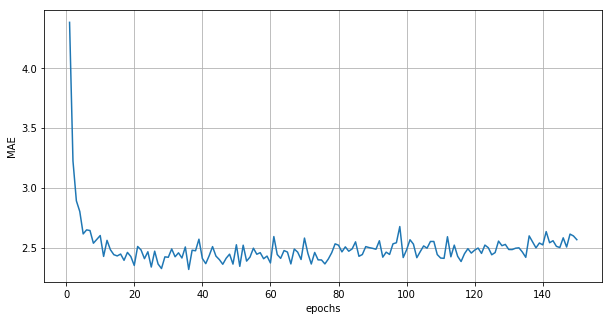

In [64]:
plt.figure(figsize =(10,5))
plt.plot(xaxis,means)
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.grid()

In [65]:
# use moving average of 10 previous epochs to smoooth the curve

In [66]:
mavg = means.rolling(10).mean()

In [67]:
mavg[:15]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     2.890918
10    2.695707
11    2.629477
12    2.588681
13    2.552657
14    2.534310
dtype: float64

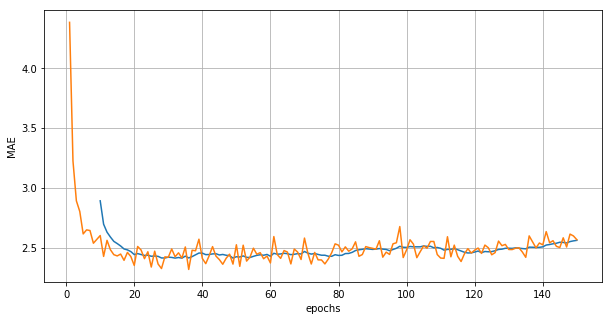

In [68]:
plt.figure(figsize =(10,5))
plt.plot(xaxis,mavg)
plt.plot(xaxis,means)
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.grid()

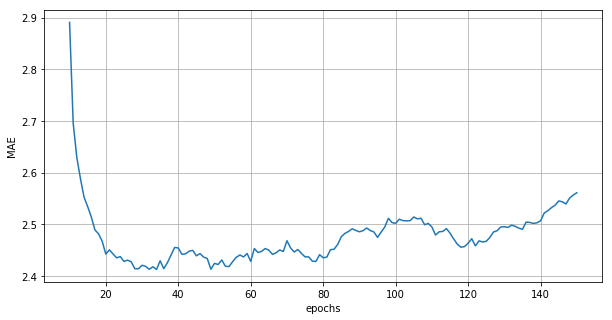

In [69]:
plt.figure(figsize =(10,5))
plt.plot(xaxis,mavg)
plt.xlabel('epochs')
plt.ylabel('MAE')
plt.grid()

In [70]:
# NN starts overfitting after 30 epochs

In [71]:
model = build_model()

In [72]:
model.fit(Xtrain_trans,y_train,epochs = 30, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(Xtest_trans,y_test)

102/102 [==============================] - 0s 1ms/step


In [73]:
test_mae_score

2.994948611539953

In [ ]:
# predictions are off by about 3000 dollars